## Import Libraries

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('audit_risk.csv')

In [22]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [24]:
df['LOCATION_ID'].replace(to_replace='LOHARU NUH SAFIDON'.split(), value=np.NaN, inplace=True)

df.dropna(inplace=True)

df.shape

(772, 27)

## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now we can transform this data to its first 2 principal components.

In [15]:
x_pca = pca.transform(scaled_data)

In [16]:
scaled_data.shape

(772, 27)

In [17]:
x_pca.shape

(772, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

Text(0, 0.5, 'Second Principal Component')

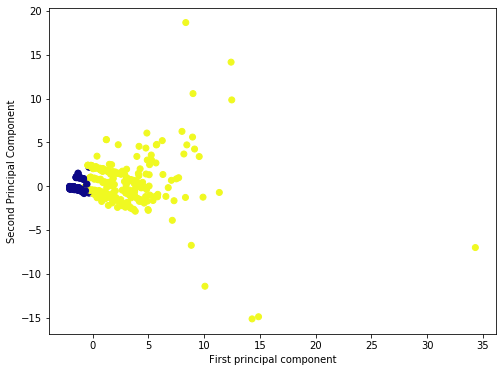

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Risk'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [26]:
pca.components_

array([[-0.1237999 , -0.00274018,  0.18331096,  0.20842286,  0.18489446,
         0.22502148,  0.21965623,  0.22481615,  0.23915954,  0.19005007,
         0.20703429,  0.20428323,  0.17133084,  0.24430128,  0.17091025,
         0.10005822,  0.06227433,  0.11054918,  0.17301259,  0.20151922,
         0.16554953,  0.28987993,  0.26346651,  0.18610537, -0.        ,
         0.24045275,  0.24061148],
       [ 0.00219031, -0.068708  , -0.1838317 , -0.07089807, -0.18339009,
        -0.11036272, -0.08158084, -0.11050778, -0.1280599 ,  0.06181065,
         0.06441441,  0.06506312, -0.26155382, -0.0528056 , -0.26136029,
         0.24135856,  0.14278047,  0.2813497 ,  0.34400235,  0.27245728,
         0.3480067 ,  0.00188052, -0.25904653,  0.42318779,  0.        ,
        -0.05975808,  0.04918812]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [33]:
df_comp = pd.DataFrame(pca.components_,columns=list(df.columns))
df_comp

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,-0.12380,-0.002740,0.183311,0.208423,0.184894,0.225021,0.219656,0.224816,0.23916,0.190050,...,0.110549,0.173013,0.201519,0.165550,0.289880,0.263467,0.186105,-0.0,0.240453,0.240611
1,0.00219,-0.068708,-0.183832,-0.070898,-0.183390,-0.110363,-0.081581,-0.110508,-0.12806,0.061811,...,0.281350,0.344002,0.272457,0.348007,0.001881,-0.259047,0.423188,0.0,-0.059758,0.049188


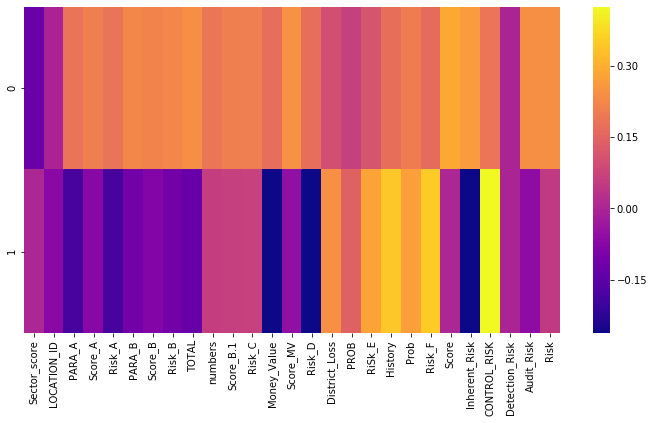

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!